# Predicting e-commerce company conversion rate

## Information

At XYZ, the most important metric is conversion rate and our data scientists are in charge of building models to understand conversion and propose ways to improve it. In the attached data set, there are 5 variables and one class:

- Country : user country based on ip address
- Age : user age based on what she claims when she signs up
- New_user: 0 if the user has already bought from us, 1 if she never bought from us in the past
- Source: if the user came from an ad, search engine or by directly typing our company address
- Total pages visited: the number of pages visited in that session 
- Converted: it is the class. Whether that session led to the user buying something or not.

Each row in the data set represents a session from a distinct user.

## Task

- Build a model to predict conversion
- Present recommendations on how we could improve conversion rate
- What are the major areas for improvement as well as guesses on what might be wrong on our site. 

## Data

Data can be downloaded at:

https://drive.google.com/file/d/0B5G7QmUBc4IRQ1E3LVYwbzdJMUU/view?pref=2&pli=1 


# The code

In [137]:
# imports

import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# machine learning imports
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.lda import LDA

# Importing data and basic stats on dataset

In [138]:
# Reading data into pandas dataframe and viewing it
input_file = "./ecommerce.csv"
df = pd.read_csv(input_file)
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,20,1,Direct,11,1
1,UK,37,1,Ads,15,1
2,UK,30,0,Seo,15,1
3,US,32,0,Seo,12,1
4,UK,29,0,Ads,16,1


In [139]:
# .info used to check out the data, to see if any null values etc.  There are no missing values here
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20400 entries, 0 to 20399
Data columns (total 6 columns):
country                20400 non-null object
age                    20400 non-null int64
new_user               20400 non-null int64
source                 20400 non-null object
total_pages_visited    20400 non-null int64
converted              20400 non-null int64
dtypes: int64(4), object(2)
memory usage: 1.1+ MB


In [140]:
# Getting some basic statistics on the data.  Was noted that the oldest person was 123 years old which doesn't seem realistic
df.describe()

,age,new_user,total_pages_visited,converted
count,20400.000000,20400.000000,20400.000000,20400.000000
mean,28.534804,0.499510,9.551569,0.500000
std,7.923346,0.500012,6.062382,0.500012
min,17.000000,0.000000,1.000000,0.000000
25%,22.000000,0.000000,4.000000,0.000000
50%,27.000000,0.000000,9.000000,0.500000
75%,34.000000,1.000000,15.000000,1.000000
max,123.000000,1.000000,30.000000,1.000000


In [141]:
# Removing the 123 year old ( and any people over 100 since more than likely dont use e-commerce websites),
# they should probably contact the Guiness book of records 

df = df[df['age']<100]

In [142]:
# data description of dataset going forward
df.describe()

,age,new_user,total_pages_visited,converted
count,20398.000000,20398.000000,20398.000000,20398.000000
mean,28.526130,0.499559,9.551132,0.499951
std,7.874934,0.500012,6.062446,0.500012
min,17.000000,0.000000,1.000000,0.000000
25%,22.000000,0.000000,4.000000,0.000000
50%,27.000000,0.000000,9.000000,0.000000
75%,34.000000,1.000000,15.000000,1.000000
max,71.000000,1.000000,30.000000,1.000000


In [143]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,20,1,Direct,11,1
1,UK,37,1,Ads,15,1
2,UK,30,0,Seo,15,1
3,US,32,0,Seo,12,1
4,UK,29,0,Ads,16,1


# Data visualisation

It is important to get a feel for the data rather than dive deep into modelling it

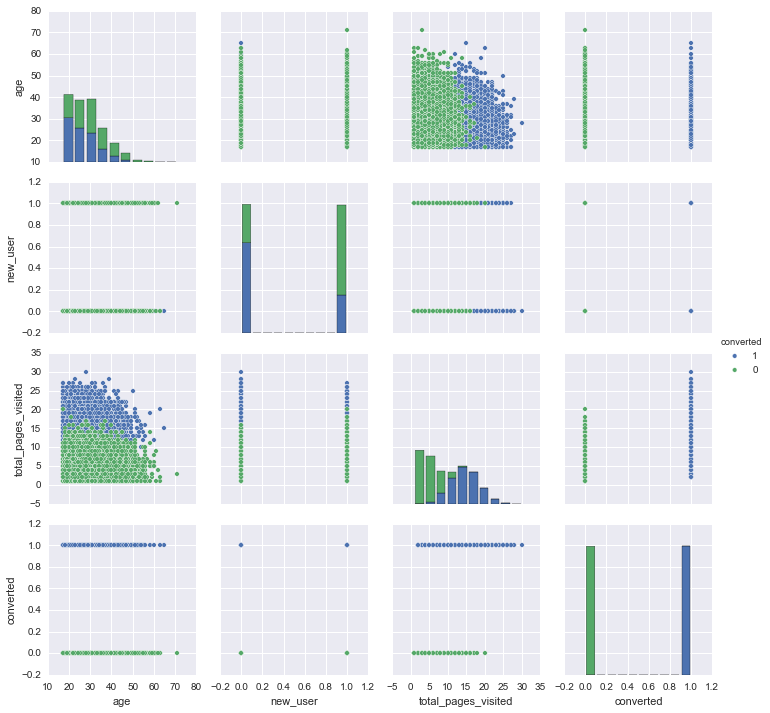

In [144]:
# Seaborn pairplot is good for getting an overall feel for the data
sns.pairplot(df,hue='converted')

In [145]:
pages_order = range(1,30,2)

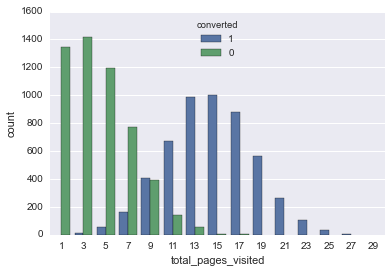

In [146]:
# Going to do some seaborn countplots show how our 5 variables effect conversion rate
sns.countplot(x='total_pages_visited',data=df,hue='converted',order=pages_order) 

It becomes obvious that the more the customer views pages the likelier they are to convert.
There is a threshold figure of around 10 visits; if the number of visits is greater than this the customer is very likely to convert


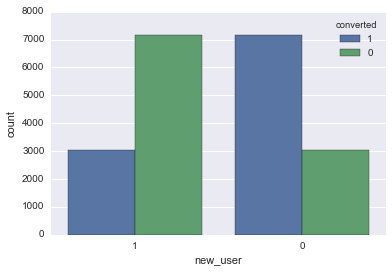

In [147]:
sns.countplot(x='new_user',data=df,hue='converted')
# company seems to be good at retaining customers but low conversion rate of new users, something to work on.

The company is very good at retaining pervious customers.
In my opinion, they also have an excellent conversion rate of new customers of about 1/3.  I am basing this on the amount of websites I would visit before buying and it would usually be a lot,  they convert a third of new people which I think is excellent.


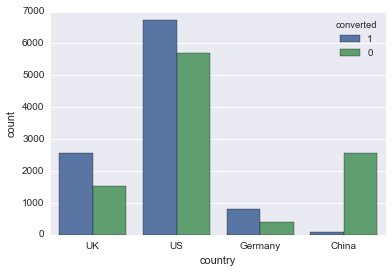

In [148]:
sns.countplot(x='country',data=df,hue='converted')
# Conversion rates for 'western' countries is similar, lots of chinese are vistiing but not buying, something to work on

Conversion rates are similar for western countries but the Chinese conversion rate is extremely poor, this would be an obvious market to target to improve sales.

In [149]:
age_range = range(df['age'].min(),df['age'].max(),5)

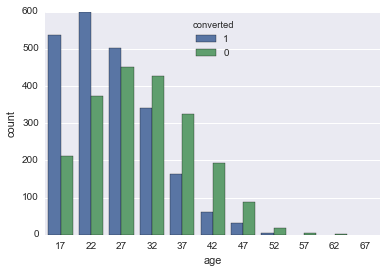

In [150]:
sns.countplot(x='age',data=df,hue='converted',order=age_range)

The conversion rate is higher for younger people.  This makes sense as younger people are more likely buy things online compared to older people. Again, targeting older people would be an avenue to increase conversion rates.

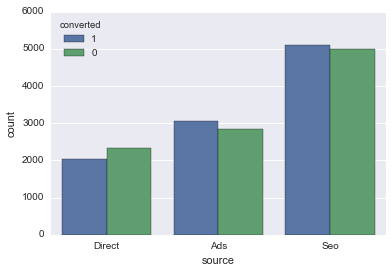

In [151]:
sns.countplot(x='source',data=df,hue='converted')

Conversion rates are source independent which means that where the customer came from had little outcome on conversion rate.

In [152]:
df.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,20,1,Direct,11,1
1,UK,37,1,Ads,15,1
2,UK,30,0,Seo,15,1
3,US,32,0,Seo,12,1
4,UK,29,0,Ads,16,1


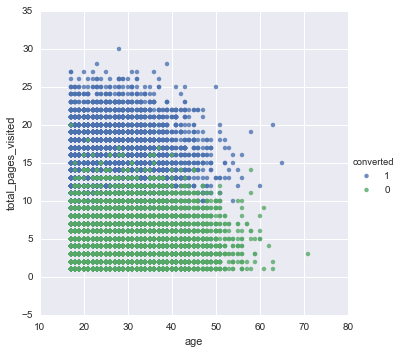

In [153]:
sns.lmplot(x='age',y='total_pages_visited',data=df,hue='converted',fit_reg=False)
# conversion rate of age with visit looks invariant

I wanted to see are young people more likely to convert with less visits, although this could be better shown it looks like it isn’t that big of a factor.  From the data is obvious that increasing total page visits is very important in conversion rate, more so than the other variables.

# Data cleaning and standardisation

In [154]:
df.tail()

,country,age,new_user,source,total_pages_visited,converted
20395,US,40,0,Seo,8,0
20396,UK,25,0,Ads,8,0
20397,US,19,1,Seo,5,0
20398,US,24,1,Direct,4,0
20399,China,28,1,Seo,5,0


In [155]:
# Standardising data

df1 = df.drop(['source','converted','country','new_user'],axis=1)

age_mean= df1['age'].mean()
age_std = df1['age'].std()
df1['age_standard'] = (df1['age'] - age_mean) / age_std

pages_mean= df1['total_pages_visited'].mean()
pages_std= df1['total_pages_visited'].std()
df1['total_pages_visited_standard'] = (df1['total_pages_visited'] - pages_mean) / pages_std
df1 =df1.drop(['age','total_pages_visited'],axis=1)
df1.tail()


,age_standard,total_pages_visited_standard
20395,1.457012,-0.255859
20396,-0.447766,-0.255859
20397,-1.209677,-0.750709
20398,-0.574751,-0.915659
20399,-0.066811,-0.750709


Since conversion rate is source independent we can exclude it to make keep our model as simple as possible.  (Side note: This is the kind of thing that physicists do a lot for calculations/models.  

‘converted’ is excluded from this dataframe as we are preparing our variables (X) for the model


In [156]:
country_dummies = pd.get_dummies(df['country'])
country_dummies.tail()

,China,Germany,UK,US
20395,0,0,0,1
20396,0,0,1,0
20397,0,0,0,1
20398,0,0,0,1
20399,1,0,0,0


I created a dummy dataframe for the countries since everything must be a number for the model and not a string

In [157]:
X = pd.concat([df1,country_dummies,df['new_user']],axis=1)
#X.drop('country',axis=1,inplace=True)

X.tail()

,age_standard,total_pages_visited_standard,China,Germany,UK,US,new_user
20395,1.457012,-0.255859,0,0,0,1,0
20396,-0.447766,-0.255859,0,0,1,0,0
20397,-1.209677,-0.750709,0,0,0,1,1
20398,-0.574751,-0.915659,0,0,0,1,1
20399,-0.066811,-0.750709,1,0,0,0,1


Our parameters are ready for moddeling (X)

In [158]:
# setting up converion dataframe
y = DataFrame(df['converted'])
y.tail()

,converted
20395,0
20396,0
20397,0
20398,0
20399,0


In [159]:
#df.drop('country',axis=1,inplace=True)
X1 = pd.concat([df,country_dummies],axis=1)
X1.tail()

,country,age,new_user,source,total_pages_visited,converted,China,Germany,UK,US
20395,US,40,0,Seo,8,0,0,0,0,1
20396,UK,25,0,Ads,8,0,0,0,1,0
20397,US,19,1,Seo,5,0,0,0,0,1
20398,US,24,1,Direct,4,0,0,0,0,1
20399,China,28,1,Seo,5,0,1,0,0,0


In [160]:
# data is split up into training and testing sets using sklearn
X_train,X_test, y_train, y_test = train_test_split(X,y)
y_train = y_train['converted'].values
y_test = y_test['converted'].values

# Principle component analysis 

In [161]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

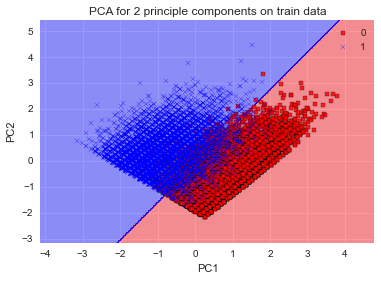

In [162]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
log_model = LogisticRegression()
log_model.fit(X_train_pca,y_train)
plot_decision_regions(X_train_pca,y_train,classifier = log_model)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(loc='best')
plt.title('PCA for 2 principle components on train data')

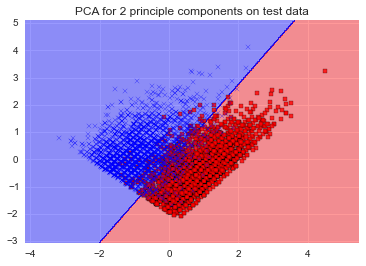

In [163]:
plot_decision_regions(X_test_pca,y_test, classifier=log_model)
plt.title('PCA for 2 principle components on test data')

In [164]:
class_predict_pca = log_model.predict(X_test_pca)
score_logit_pca = metrics.accuracy_score(y_test,class_predict_pca)
print 'The accuracy of the PCA logistic regression model is %.4f ' %score_logit_pca


The accuracy of the PCA logistic regression model is 0.9333 


In [165]:
cov_mat = np.cov(X_train.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)

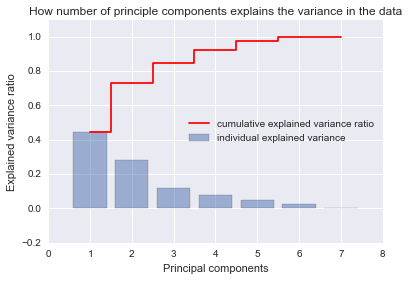

In [166]:
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals,reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,8),var_exp,alpha = 0.5, align='center',
       label='individual explained variance')
plt.step(range(1,8),cum_var_exp,where='mid',
        label = 'cumulative explained variance ratio',color='r')
plt.ylabel('Explained variance ratio')
plt.ylim([-0.2,1.1])
plt.xlabel('Principal components')
plt.legend(loc='center right')
plt.title('How number of principle components explains the variance in the data')


In [167]:
print 'From the above graph by taking the 2 principle components we keep %.2f of the variance' %cum_var_exp[1]

From the above graph by taking the 2 principle components we keep 0.73 of the variance


# First model: Logistic Regression

Logistic regression was chosen as the model because it is a simple model for a classification problem like this

In [168]:
# Y_train is made into 1D-array
#y_train= np.ravel(y_train)

In [169]:
# model is fitted to training data
log_model.fit(X_train,y_train,)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [170]:
# predicting the test values from our model
class_predict = log_model.predict(X_test)

In [171]:
# scoring the model in relation to the y_test dataset
score_logit = metrics.accuracy_score(y_test,class_predict)
print 'The accuracy of the logistic regression model is %.4f ' %score_logit

The accuracy of the logistic regression model is 0.9410 


In [172]:
# making a fitting coefficient dataframe for each variable
coeff_df = DataFrame(zip(X.columns,np.transpose(log_model.coef_)))
coeff_df

,0,1
0,age_standard,[-0.525980780081]
1,total_pages_visited_standard,[4.67093534927]
2,China,[-2.65753018914]
3,Germany,[1.24396621501]
4,UK,[1.23000056975]
5,US,[0.784196615176]
6,new_user,[-1.69485846237]


The logistic regression model give an accuracy of 93.8% and shows that by long way the best predictor of conversion is the number of pages visited per person/customer.  We can also tell if the person is from China they almost certainly won’t be buying anything, a clear market to target.

# Second Model: K- Nearest Neighbours

To verify our first model another suitable model is calculated and results compared. 

In [173]:
# default number of neighbours is 5, a good starting point
knn = KNeighborsClassifier()

In [174]:
# fitting data to the model
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [175]:
# predicting the outcome from our test data
y_pred = knn.predict(X_test)

In [176]:
# findout out how accurate the model is
score_knn= metrics.accuracy_score(y_test,y_pred)
print 'The accuracy of the K-nearest neighbours model is %.4f ' %score_knn

The accuracy of the K-nearest neighbours model is 0.9296 


This gives us a similar value for the logistic regression model indicates that these models are accurate for modelling this data but can we improve this accuracy by changing k?

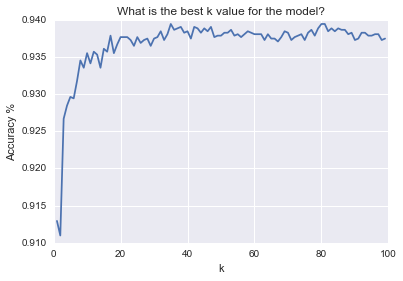

In [177]:
# loops through k values from 1-99 and computes accuracy for that k then the accuracy is plotted as a function of k.
# If we had a very large dataset I wouldnt advice doing this but its useful for this purpose
k_range = range(1,100)
accuracy = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(y_test,y_pred))
    
plt.plot(k_range,accuracy)
plt.title('What is the best k value for the model?')
plt.xlabel('k')
plt.ylabel('Accuracy %')

The  accuracy remains relativly constant when k > 5 so k=5 was a good value to use for the model
We have found that both Logistic regression and K nearest neighbours are suitable for accurately modelling this data.


# Third model: SVM ( Support Vector Machines)

In [178]:
svm = SVC(kernel = 'linear',C=1.0,random_state=0)
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test)
score_svm= metrics.accuracy_score(y_test,y_pred_svm)
print 'The accuracy of the SVM model is %.4f ' %score_svm

The accuracy of the SVM model is 0.9412 


Linear SVM gives a similar accuracy as K-NearestNeighbours and Logistic regression

# Conclusions
Reminder of the tasks:

- Build a model to predict conversion
    - I used logistic regression to model data based on the variables: Country, total number of visits, new customer add customer age (source didn’t effect conversion rate much so was excluded for simplicity)
    - The logistic regression model gave an accuracy of 94.5% for out test data
    - To test the validity of this the data was also modelled using K-nearest neighbours and SVM
    - These gave a similar accuracy values than the logistic regression (94%),thus, validifying our initial model
    - I personally prefer the logistic regression model since its similar but either would suffice

- Present recommendations on how we could improve conversion rate
    - The main indicator of conversion rate is the total number of pages a person visits. obviously, increasing this number for each person will yield a higher conversion rate
    - There appears to be a threshold number of pages visited of about 10, above this number conversion rate is very high. Reducing this threshold number would improve total conversions

- What are the major areas for improvement as well as guesses on what might be wrong on our site.
    - The conversion rate of Chinese visitors is extremely low. Reasons for this could be that the website is translated poorly into Chinese and as a result they are put off/confused by the product. I recommend improving your website for the Chinese customer. You could run an advertising campaign on Chinese social media platforms (can’t remember the name but there is one very popular one) to boost the Chinese conversion rate
    - Older customers have a lower conversion rate than younger users, this isn’t that surprising considering young people are more trusting spending money online. Still, improvements could be made finding out how to make the website more accessible to the older people. Could the layout be improved? Advertising campaigns could be put out on more traditional media such as early morning radio and drive time radio.

